# Prediction of tumor type

In this post I will analyze the dataset on diagnosis of breast cancer. The data being used is from the UCI repository and has also been widely analyzed in lots of Kaggle kernels. This is my own take on the dataset.

Diagnosing a tumor can be tricky without actually doing a physical intervention. This might not be possible in some cases. This dataset provides a list of patients who were diagnosed with malignant or benign tumors. A list of around thirty features are included in the data. The features are extracted from the images of the tumor that were taken during diagnosis. More details about the data set can be found here [UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

## Importing basic libraries and data

First we import some of the basic python libraries. The data is in CSV format and we can import into pandas dataframe which is great tool for handling dataframeworks. Seaborn is a statistical tool in python which is useful for carrying out various statistical tests as well as for data visualization

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('data.csv')

In [225]:
#dataset.drop(axis=1,columns = 'Unnamed: 32', inplace= True)
dataset.head(n = 20)# this will give a preview of the first 20 patients


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


### Some Basic Visualization
One of the most basic visualizations that we can do is to do a bar plot of the number of the malignant (label M) and benign (label B) tumor. We can do this by using the seaborn package which is a widely used package for statistical analysis and plotting.

Text(0.5,1,'Bar plot for the two diagnosis ')

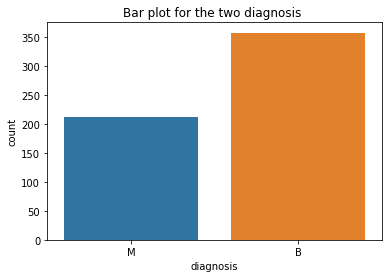

In [226]:
sns.countplot(x = 'diagnosis', data = dataset).set_title('Bar plot for the two diagnosis ')


From the figure above we see that the data consists of more benign tumor diagnosis (around 350 in number ) compared to cases of malignant tumor (around 200 in number). The numbers here are not very skewed and one can mistakenly assume that Wisconsin seems to have a big case of breast cancer amongst it's population. It seems so because right now we are only concentrating on a specific class of the population, females with tumors in their breasts to be exact. If we were to compare the number of cases of where malignant tumor was diagnosed with the to total number of persons visiting hospitals all over Wisconsin then we would find that then the number of cases with cancer would be significantly small. 

### Dependency between different features

On oour first trial let us see if we can extract anything just from only a few features at the start. We can look at the relations between tumor size and whether it is malignant or not. However looking at all the dependencies might be a little overwhelming at the start. We can rather select a few set of columns and then look at the dependencies between those columns.

In [227]:
#Selective data set

dataset_select = dataset.iloc[:, 1:7]
dataset_select.head(n = 10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
3,M,11.42,20.38,77.58,386.1,0.14250
4,M,20.29,14.34,135.10,1297.0,0.10030
5,M,12.45,15.70,82.57,477.1,0.12780
6,M,18.25,19.98,119.60,1040.0,0.09463
7,M,13.71,20.83,90.20,577.9,0.11890
8,M,13.00,21.82,87.50,519.8,0.12730
9,M,12.46,24.04,83.97,475.9,0.11860


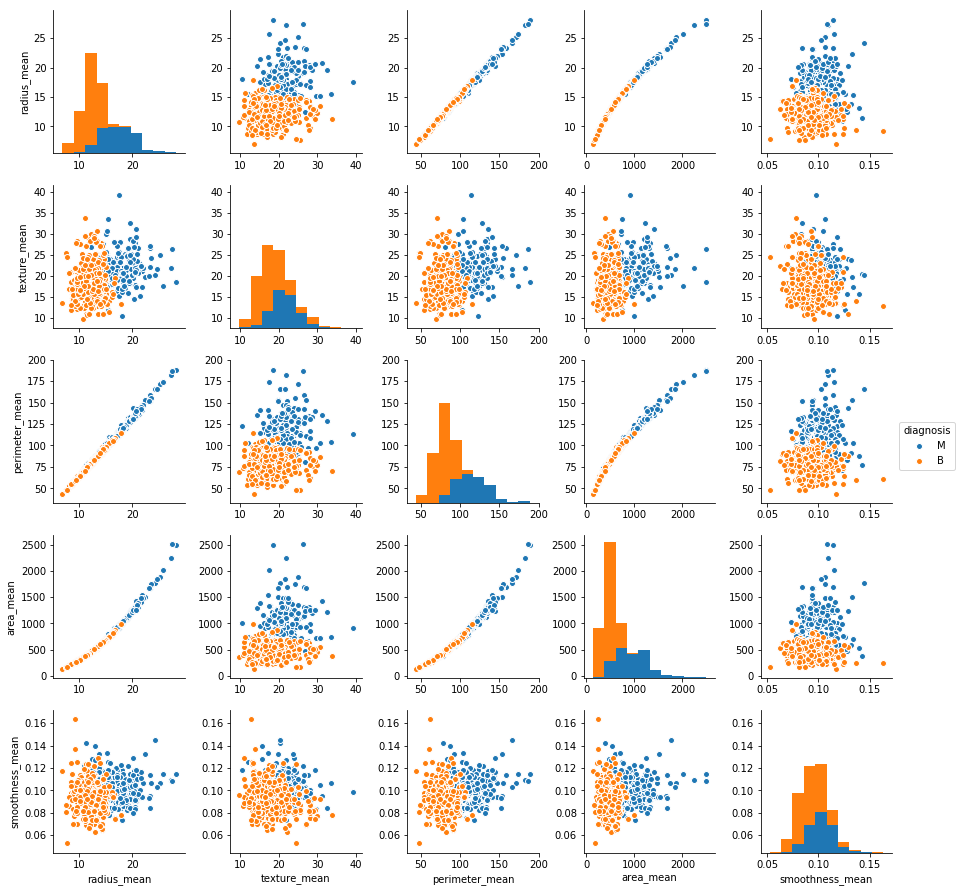

In [228]:
sns.pairplot(dataset_select, hue = 'diagnosis')

The pair wise plot make gives us some very interesting results. First of all let us look at some of the plots where it seems that there is some sort of a functional relation between the variables that have been plotted against each other. E.g. look at area_mean vs radius_mean, clearly they have to be related as area is proportional to square of the radius. Similar argument goes for plots between perimeter_mean and radius_mean, perimeter_mean and area_mean.

The plots that generates the most interest are the scatter plots where the distribution in the given parameter space(spanned by the variables that have been plotted against each other). We see some sort of clustering that happens. If we look at the plot of texture mean vs the radius_mean, the scatter points tend to cluster according to the diagnosis.

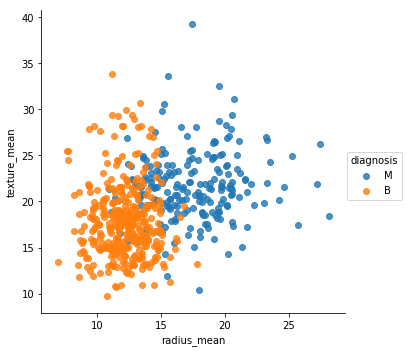

In [229]:
sns.lmplot('radius_mean', 'texture_mean', hue = 'diagnosis', data = dataset, fit_reg = False)

Here I did a scatter plot for texture_mean vs radius_mean and the markers are colored according to the diagnosis. We can see that there is a clustering of points according to the diagnosis. In the most simple scenario one might be able to run a linear classifier to demarcate between malignant (blue markers) and the benign (orange markers) tumors. In order to do the classification we will use the logistic classfier from sklearn. The logistic classifier will classify the data according to the diagnosis.

In [230]:
# Importing the Logistic Regression class from sklearn
from sklearn.linear_model import LogisticRegression

We now need to create the data set accordingly. We have a feature data set or the X_train given by radius_mean and texture_mean. The y train will be given by the diagnosis column.

In [231]:
#Creating the X_train and y_train
X_train =  dataset.loc[:,'radius_mean':'texture_mean'].values
y_train = dataset.loc[:, 'diagnosis'].values

The X_train values need to be scaled before any sort of classification. This step is very important for any Regression or classification training that needs to be carried out. We do this by using a Standard Scaler from sklearn.preprocessing. 

In [232]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Now the y_train data is has entries of all the diagnosis but in the diagnosis is encoded as M (for malignant)
or B (for benign). We need to convert into values that the logistic regression can understand. In order to do so we will need to encode the diagnosis into numerics. 

In [233]:
#Encoding the diagnosis 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_train = label.fit_transform(y_train)

In the previous step we initialize the class and use the fit_transform method to convert the diagnosis to binary (1 = M, 0 = B). We have now everything we need to start the logistic regression algorithm. 

In [234]:
#Logistic classification

classifier = LogisticRegression(max_iter=1000, C=1E5)
classifier.fit(X_train, y_train)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Visualizing the classification

We shall now try to visualize the classifier that we created. We will try to create a color map to differentiate between the two different classifications that we have created. 

In [235]:
#Creating a mesh for visulization
h = .01 #mesh step size
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])

In the above step we are creating a grid mesh of the features in X_train. We will create an array that will contain the value of predictions corresponding to each point on the grid. This predicted values will be used to create a colorplot. 

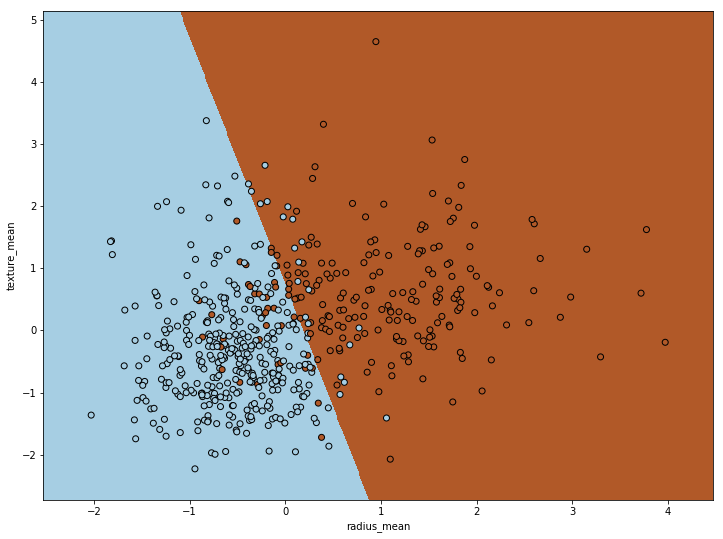

In [236]:
Z = Z.reshape(x_mesh.shape)
plt.figure(figsize=(12, 9))
plt.pcolormesh(x_mesh, y_mesh, Z, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()


We can see that we have managed to classify quite nicely on the basis of just two features the radius and the texture. There are of course outliers in both cases. Probably one might be able to reduce this using some sort of a logistic non-linear classifier. However this example was to demonstrate how even simple linear classification can actually help us know about the properties of the data at hand. It should be noticed that in the above plot I have plotted the scaled variables against each other. For demonstration purposes this should suffice. It is very easy to get back the original values, you just need to use inverse_transform method of the StandardScaler.

## Delving deeper into the data

Over the course of the previous measurements we saw how just using two features we were able to form some sort of a classification. The interdependence between features is a key to a better understanding as to what are the common traits of malignant and benign tumors. What we can do is try to group together cases without referring to the diagnosis itself and see if common traits appear. In order to do so we will be using Self Organizing Maps. Self organizing maps in the most simplest of terms, are a type of unsupervised learning which groups samples with similar features together. Using the SOM technique and using all the features listed in the dataset we will demonstrate whether malignant and benign tumors are occupy different positions on the map.

### Processing the data
For the SOM we do not require only the features. We will keep the diagnosis as result data for now as it will be uselful to plot it over the SOM to see if the SOM was indeed successful in seeing difference between malignant and benign tumors. 

In [246]:
features = list(dataset)
features = np.delete(features, [0,1, 32])
X_train = dataset.loc[:, features].values

Before we start learning from our data we need to take into scale each feature so that they are all treated at an equal footing. This time we will normalize our features instead of using a Standard scaling. We can use the MinMaxScaler from sklearn towards this purpose. 

In [247]:
from sklearn.preprocessing import MinMaxScaler
normal_sc = MinMaxScaler(feature_range = (0,1))
X_train = normal_sc.fit_transform(X_train)

We will be using an implementation of the Self Organizing maps known as minisom. You can find the details of how you can install this package [here](https://pypi.python.org/pypi/MiniSom/1.0)

In [266]:
from minisom import MiniSom
som = MiniSom(x = 15, y = 15, input_len = 30, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X_train)
som.train_random(data = X_train, num_iteration = 100)

Now let us visualize the results and see how the map looks like.

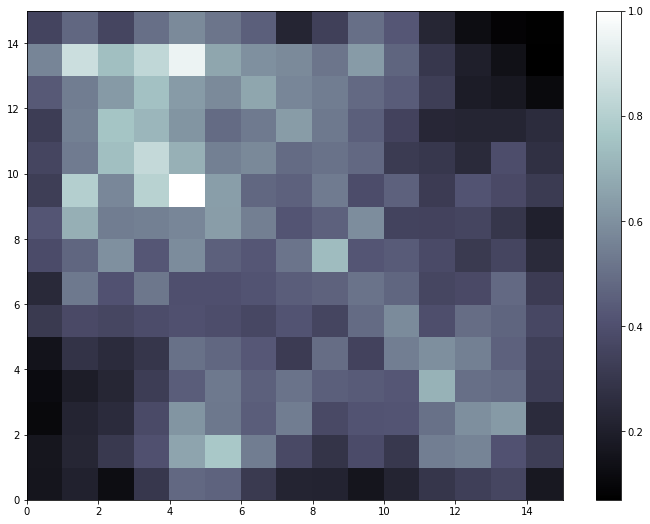

In [268]:
plt.figure(figsize=(12, 9))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()


The SOM basically consists of an array of neurons which are plotted in the above 2D color map. The neurons are assigned color on the basis of how similar they are. We have 5x5=25 neurons as an example in the above case. The type of plot shown above is also known as the distant plot. Neurons which are darker in color are more closer in distance to each other and those which are lightly colored are further away from their neighbors. In general in case of a large map we will be able to see clustering of similar (darker ) neurons the clusters being separated by light colored neurons. 

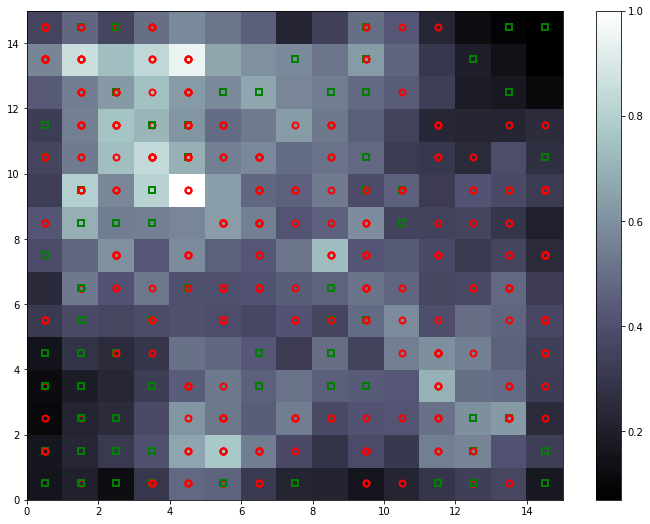

In [269]:
plt.figure(figsize=(12, 9))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X_train):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 6,
         markeredgewidth = 2)
plt.show()

We plot that color coded diagnosis on top of the SOM. We can see that the SOM is not very successful in distinguishing between malignant and benign tumors. One might be able to use a larger number of neurons to distinguish between the diagnosis. However we can use a powerful machine learning technique knows as Deep Neural Networks to make a prediction of diagnosis based on the existing data. I will describe this in a different blog post.